# Atividade I

- Crie um script que receba uma lista de abreviaturas de meses como argumento e gera as pastas e gráficos necessários para os meses de referência.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os 
import sys

def analise_mensal(mes: str) -> None:
    """
    mes -> string - MAR para Março, ABR para Abril, MAI para Maio, JUN para Junho e DEZ para Dezembro.
    
    """
    # Entrada de dados
    
    meses = ['MAR','ABR','MAI','JUN','DEZ']
    if mes in meses:
        caminho = f"C:\\Users\\alcid\\GitHub\\Portfolio\\EBAC\\Dados\\dados_mensais\SINASC_RO_2019_{mes}.csv"
        data = pd.read_csv(caminho)
    else:
        return print(f'\n-----ERRO: Valor {mes} não presente na lista, entrada deve ser {meses}\n\n')
        
    # Transformação dos dados
    data['DTNASC'] = pd.to_datetime(data['DTNASC'])
    data['Dia da semana'] = data['DTNASC'].dt.day_name()
    transformar =  {
        'Monday': 'segunda-feira',
        'Tuesday': 'terça-feira',
        'Wednesday': 'quarta-feira',
        'Thursday': 'quinta-feira',
        'Friday': 'sexta-feira',
        'Saturday': 'sábado',
        'Sunday': 'domingo'
    }

    data['Dia da semana'] = data['Dia da semana'].map(transformar)
    data['Dia'] = data['DTNASC'].dt.day 
    
    pasta = f'{mes}'
    caminho = f"C:\\Users\\alcid\\GitHub\\Portfolio\\EBAC\\Dados\\Imagens_dados_mensais\\{pasta}"
    os.makedirs(caminho, exist_ok=True)
    
    # Gráficos
        # Nascimento Diário
    plt.figure(figsize=(10,5))
    linha = sns.lineplot(data.groupby('Dia')['SEXO'].count())
    linha.set_title('Nascimentos por dia', fontsize=20)
    plt.savefig(f"C:\\Users\\alcid\\GitHub\\Portfolio\\EBAC\\Dados\\Imagens_dados_mensais\\{pasta}\\nascimento_dia.png")
    plt.show()
    
        # Linhas
    for atributo in ['APGAR1','APGAR5','PESO']:
        plt.figure(figsize=(10,5))
        linha = sns.lineplot(data.groupby('Dia')[atributo].mean())
        linha.set_title(f'Média diária do {atributo}', fontsize=20)
        plt.savefig(f"C:\\Users\\alcid\\GitHub\\Portfolio\\EBAC\\Dados\\Imagens_dados_mensais\\{pasta}\\dia_{atributo}.png")
        plt.show()
        
        
        # Barras
    for atributo in ['SEXO','GESTACAO','GRAVIDEZ','Dia da semana','CONSULTAS','ESCMAE']:
        plt.figure(figsize=(10,5))
        valores = data[atributo].value_counts().values
        indices = data[atributo].value_counts().index
        barra = sns.countplot(data=data, y=atributo, orient='h', order=indices)
        barra.set_title(f'Distribuição das classes do atributo {atributo}', fontsize=20)

        for cont, val in zip(range(len(valores)), valores):   
            porc = val/(valores.sum())
            plotar = f'{val} ({round(porc*100,2)}%) ' 
            if porc < 0.1: 
                text_pos = valores.max()/15 
            else:
                text_pos = val/2
            barra.annotate(plotar, # Texto
                           xy =  (text_pos, cont), # Posição do texto (x, y)
                           fontsize=12, # Tamanho da fonte
                           color='black') # Cor
        plt.xlabel('Contagem')
        plt.savefig(f"C:\\Users\\alcid\\GitHub\\Portfolio\\EBAC\\Dados\\Imagens_dados_mensais\\{pasta}\\dispersao_{atributo}.png")
        plt.show()
        
    return None
lista_meses = sys.argv[1:]
for mes in lista_meses:
    

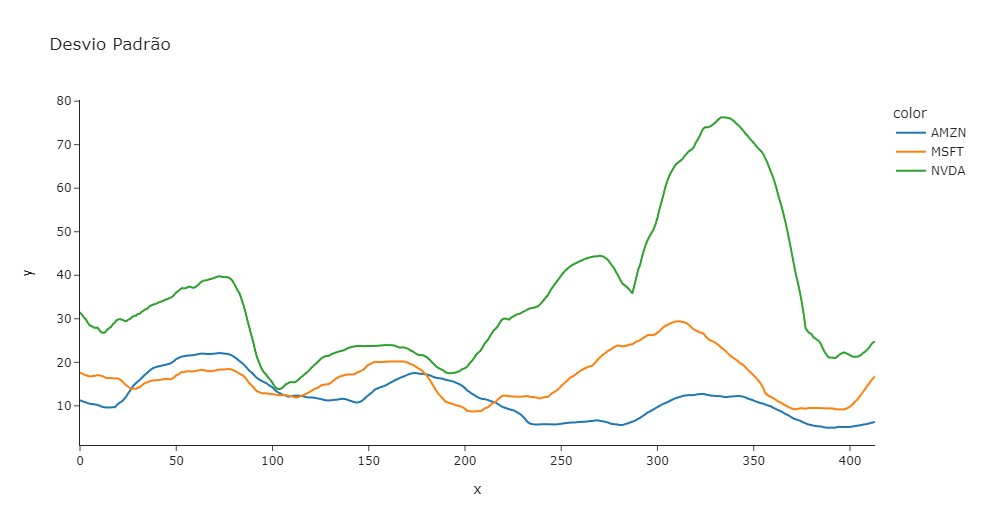